## Entrenamiento PM2.5

In [1]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import missingno as msn

pd.options.mode.chained_assignment = None 

from sklearn.externals import joblib
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor 

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

#### Hacemos una función para obtenner el -promedio- de los dos modelos

In [2]:
def predictor_mean(model0_1,modelo_2,X_set):  
    #aplicamos los predict
    forecast_q = model0_1.predict(X_set) 
    forecast = modelo_2.predict(X_set)
   #generamos una lista dummy: 
    forecast_mean = forecast 
    
    for i in range(len(X_set)):
        if  forecast[i] < 135:
            forecast_mean[i] = forecast[i]
        elif  forecast_q[i] > 160:
            forecast_mean[i] = forecast_q[i]
        if  130 < forecast_q[i] <155 and 130 < forecast[i] < 155:
            forecast_mean[i] = (0.3*forecast_q[i] + 0.7*forecast[i])
        if  140 < forecast_q[i] <160 and 140 < forecast[i] < 160:
            forecast_mean[i] = (forecast_q[i] + forecast[i])/2
    return forecast_mean

## Hacemos una función para graficar

In [3]:
def ploter(y_test_0,X_test_0,pronosticados_0,model):
    
    plt.scatter(y_test_0, pronosticados_0,alpha=0.5,color="royalblue")
    score = round(model.score(X_test_0, y_test_0),3)
    rmse = round(np.sqrt(mean_squared_error(y_test_0, pronosticados_0)),3)
    plt.plot([30,130],[30,130],color="k",linestyle='--')
    
    plt.axhline(y=150, color='k', linestyle='--')
    plt.axvline(x=150, color='k', linestyle='--')
    plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate("Score ="+str(score), (15,139), xytext = (15, 139 + 1), 
                  horizontalalignment='left')
    plt.annotate("RMSE ="+str(rmse), (15,119), xytext = (15, 119 + 1), 
                  horizontalalignment='left')
    
    
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.title('XGBoost Predicted vs Actual')
    plt.show()

In [4]:
def ploter_title(y_test_0,X_test_0,pronosticados_0,model,titulo,ejex,ejey,color_user,ruta="./savedpic.png",dpi_user=300):
    
    plt.scatter(y_test_0, pronosticados_0,alpha=0.5,color=color_user)
    score = round(model.score(X_test_0, y_test_0),3)
    rmse = round(np.sqrt(mean_squared_error(y_test_0, pronosticados_0)),3)
    plt.plot([30,130],[30,130],color="k",linestyle='--')
    
    plt.axhline(y=150, color='k', linestyle='--')
    plt.axvline(x=150, color='k', linestyle='--')
    plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
                  horizontalalignment='right')
    plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
                  horizontalalignment='right')
    plt.annotate("Score ="+str(score), (15,139), xytext = (15, 139 + 1), 
                  horizontalalignment='left')
    plt.annotate("RMSE ="+str(rmse), (15,119), xytext = (15, 119 + 1), 
                  horizontalalignment='left')
    
    
    plt.xlabel(ejex)
    plt.ylabel(ejey)
    plt.title(titulo)
    plt.savefig(ruta, dpi=dpi_user)
    plt.show()

## Cargamos los modelos ya entrenados:

In [5]:
conta = 'PM25'

In [6]:
model = [0 for col in range(25)]
modelq = [0 for col in range(25)]

In [7]:
model2415 = joblib.load('./modelos/PM25/PM25_2415hora.pkl')

[16:10:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [8]:
for i in range(0,24):
    model[i] = joblib.load(str('./modelos/'+ conta +'/'+ conta + '_'+str(i+1)+'hora.pkl'))
    print(str('./modelos/' + conta + '/' + conta + '_' + str(i+1)+'hora.pkl'))
    #modelq[i] = joblib.load(str('./modelos/'+conta+'/' + conta+ '_'+str(i+1)+'hora_quantile.pkl'))
    if i == range(0,24)[-1]:
        print('./modelos/O3/O3_'+str(i+1)+'hora.pkl')

[16:10:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
./modelos/PM25/PM25_1hora.pkl
[16:10:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
./modelos/PM25/PM25_2hora.pkl
[16:10:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
./modelos/PM25/PM25_3hora.pkl
[16:10:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
./modelos/PM25/PM25_4hora.pkl
[16:10:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
./modelos/PM25/PM25_5hora.pkl
[16:10:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
./modelos/PM25/PM25_6hora.pkl
[16:10:59] WARNING: /workspace/src/objective/regression_ob

#### Cargamos los datos:

In [8]:
data_hour_merge = pd.read_csv("/DATA/paw/jupyterhub_notebook/daniel.bustillos/DanielBustillos/contaminación/pipeline-norberto/datos_modelos_PM25meanouliers.csv")

In [9]:
data_hour_merge.head(2)

,PM2.5_7.0_mean,PM10mean_14.0_mean,PM25mean_6.0_mean,PM25mean_0.0_max,PM2.5_6.0_mean,PM10mean_11.0_max,PM10_15.0_mean,PM10mean_25.0_mean,PM10mean_5.0_max,PM10_1.0_max,...,TMP_mean_frcst_15,TMP_mean_frcst_16,TMP_mean_frcst_17,TMP_mean_frcst_18,TMP_mean_frcst_19,TMP_mean_frcst_20,TMP_mean_frcst_21,TMP_mean_frcst_22,TMP_mean_frcst_23,TMP_mean_frcst_24
0,25.5,52.083333,30.333333,42.208333,22.000000,69.916667,64.307692,46.173611,70.250,76.0,...,16.00625,15.5375,14.050000,12.823529,12.358824,11.941176,11.741176,11.535294,12.241176,9.50625
1,22.0,51.763889,30.333333,42.083333,19.583333,70.250000,61.692308,46.555556,70.125,52.0,...,15.53750,14.0500,12.823529,12.358824,11.941176,11.741176,11.535294,12.241176,9.506250,8.98125


Definimos la lista de los targets:

In [10]:
target = "PM25mean_max_frcst_"

In [11]:
lista = []
for i in range(1,25):
    lista.append(str(target+str(i)))

In [12]:
data_hour_merge[["fecha",'PM25mean_0.0_max','PM25mean_1.0_max','PM25mean_2.0_max']].head(10)

,fecha,PM25mean_0.0_max,PM25mean_1.0_max,PM25mean_2.0_max
0,2016-01-04 01:00:00,42.208333,42.875000,42.875000
1,2016-01-04 02:00:00,42.083333,42.208333,42.875000
2,2016-01-04 03:00:00,42.041667,42.083333,42.208333
3,2016-01-04 04:00:00,42.208333,42.041667,42.083333
4,2016-01-04 05:00:00,42.041667,42.208333,42.041667
5,2016-01-04 06:00:00,42.291667,42.041667,42.208333
6,2016-01-04 07:00:00,43.291667,42.291667,42.041667
7,2016-01-04 08:00:00,44.000000,43.291667,42.291667
8,2016-01-04 09:00:00,44.125000,44.000000,43.291667
9,2016-01-04 10:00:00,44.250000,44.125000,44.000000


In [13]:
data_hour_merge[["fecha","PM25mean_0.0_max","PM25mean_max_frcst_1","PM25mean_max_frcst_2","PM25mean_max_frcst_3"]].head(10)

,fecha,PM25mean_0.0_max,PM25mean_max_frcst_1,PM25mean_max_frcst_2,PM25mean_max_frcst_3
0,2016-01-04 01:00:00,42.208333,42.083333,42.041667,42.208333
1,2016-01-04 02:00:00,42.083333,42.041667,42.208333,42.041667
2,2016-01-04 03:00:00,42.041667,42.208333,42.041667,42.291667
3,2016-01-04 04:00:00,42.208333,42.041667,42.291667,43.291667
4,2016-01-04 05:00:00,42.041667,42.291667,43.291667,44.000000
5,2016-01-04 06:00:00,42.291667,43.291667,44.000000,44.125000
6,2016-01-04 07:00:00,43.291667,44.000000,44.125000,44.250000
7,2016-01-04 08:00:00,44.000000,44.125000,44.250000,47.000000
8,2016-01-04 09:00:00,44.125000,44.250000,47.000000,47.291667
9,2016-01-04 10:00:00,44.250000,47.000000,47.291667,47.791667


In [14]:
data_hour_merge.drop("fecha",axis=1,inplace=True)

# Empezamos con el entrenamiento:

#### HORA 1 

#### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [18]:
hora = 1

In [19]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [20]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [21]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

Definimos los conjuntos de prueba:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelo

In [20]:
from xgboost.sklearn import XGBRegressor

In [21]:
model[0] = XGBRegressor(learning_rate=0.05,n_estimators=1500,n_jobs=128,random_state=123)

In [22]:
model[0].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:07:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=128, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [23]:
#Predict 
pronos_1 = model[0].predict(X_test)

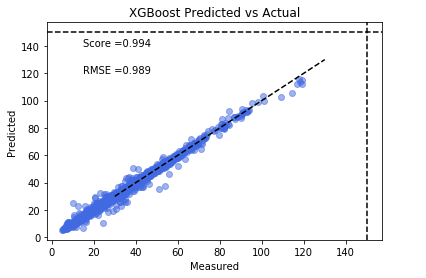

In [24]:
ploter(y_test,X_test,pronos_1,model[0])

In [25]:
# now you can save it to a file
joblib.dump(model[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl')

['./modelos/PM25/PM25_1hora.pkl']

## Gradienst Descent:

In [26]:
modelq[0] = GradientBoostingRegressor(n_estimators=300,learning_rate=0.1,loss="quantile",alpha=0.95,verbose=1,random_state=123)#,n_estimators=1000)

In [27]:
modelq[0].fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3790            1.48m
         2           1.2661            1.40m
         3           1.1811            1.38m
         4           1.1159            1.38m
         5           1.0596            1.37m
         6           1.0090            1.36m
         7           0.9648            1.35m
         8           0.9255            1.34m
         9           0.8943            1.33m
        10           0.8660            1.32m
        20           0.6804            1.31m
        30           0.5467            1.28m
        40           0.4478            1.27m
        50           0.3722            1.26m
        60           0.3089            1.23m
        70           0.2645            1.21m
        80           0.2248            1.17m
        90           0.1955            1.12m
       100           0.1727            1.07m
       200           0.1013           30.38s
       300           0.0991            0.00s


GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=300,
             n_iter_no_change=None, presort='auto', random_state=123,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [28]:
pronos_1_q = modelq[0].predict(X_test)

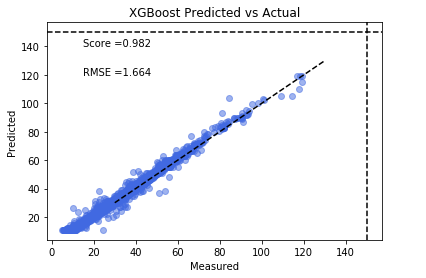

In [29]:
ploter(y_test,X_test,pronos_1_q,modelq[0])

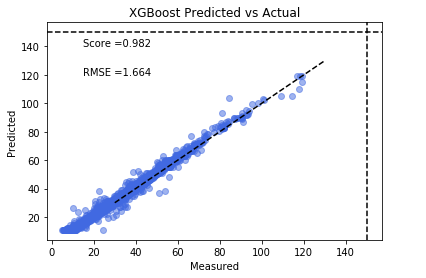

In [30]:
ploter(y_test,X_test,pronos_1_q,modelq[0])

In [31]:
# now you can save it to a file
joblib.dump(model[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

['./modelos/PM25/PM25_1hora_quantile.pkl']

# HORA 2

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [32]:
hora = 2

In [33]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [34]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [35]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [37]:
modelq[1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [38]:
modelq[1].fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.5255            4.79m
         2           1.5102            4.80m
         3           1.4960            4.80m
         4           1.4815            4.80m
         5           1.4660            4.79m
         6           1.4500            4.79m
         7           1.4365            4.79m
         8           1.4225            4.78m
         9           1.4090            4.78m
        10           1.3970            4.77m
        20           1.2917            4.71m
        30           1.2055            4.65m
        40           1.1361            4.59m
        50           1.0767            4.47m
        60           1.0223            4.43m
        70           0.9765            4.37m
        80           0.9355            4.32m
        90           0.8999            4.28m
       100           0.8699            4.25m
       200           0.6590            3.86m
       300           0.5107            3.48m
       40

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=123,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [39]:
pronos_2_q = modelq[1].predict(X_test)

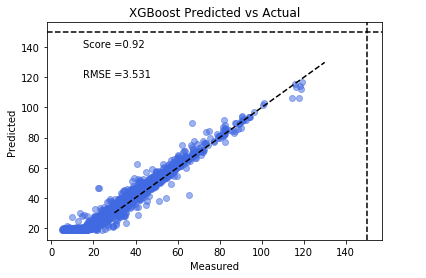

In [40]:
ploter(y_test,X_test,pronos_2_q,modelq[1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

['./modelos/PM25/PM25_2hora_quantile.pkl']

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=1500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:17:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [ ]:
pronos_2_q = model[hora-1].predict(X_test)

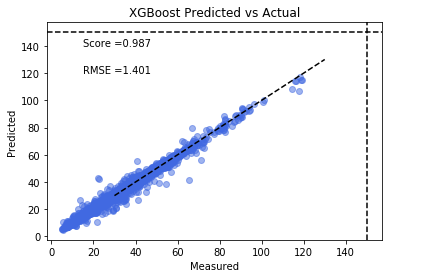

In [ ]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl')

['./modelos/PM25/PM25_2hora.pkl']

# HORA 3

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [ ]:
hora = 3

In [ ]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [ ]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [ ]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.5271            4.69m
         2           1.5124            4.68m
         3           1.4966            4.68m
         4           1.4821            4.67m
         5           1.4676            4.67m
         6           1.4539            4.69m
         7           1.4410            4.70m
         8           1.4286            4.70m
         9           1.4163            4.70m
        10           1.4040            4.67m
        20           1.2966            4.58m
        30           1.2118            4.55m
        40           1.1419            4.48m
        50           1.0812            4.42m
        60           1.0261            4.41m
        70           0.9762            4.40m
        80           0.9348            4.37m
        90           0.8980            4.34m
       100           0.8643            4.31m
       200           0.6420            3.94m
       300           0.4952            3.54m
       40

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=123,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

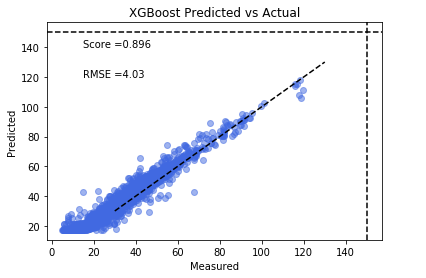

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

['./modelos/PM25/PM25_3hora_quantile.pkl']

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=1500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:26:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [ ]:
pronos_2_q = model[hora-1].predict(X_test)

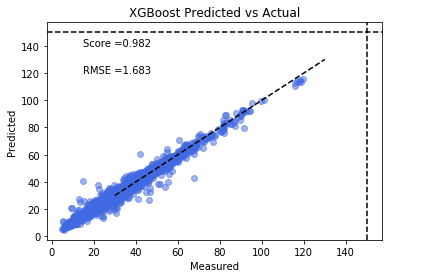

In [ ]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+ conta +'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM25/PM25_3hora.pkl']

# HORA 4

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [ ]:
hora = 4

In [ ]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [ ]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [ ]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.5292            4.62m
         2           1.5145            4.59m
         3           1.4997            4.59m
         4           1.4852            4.58m
         5           1.4720            4.57m
         6           1.4587            4.57m
         7           1.4462            4.57m
         8           1.4344            4.55m
         9           1.4226            4.50m
        10           1.4109            4.46m
        20           1.3071            4.54m
        30           1.2259            4.56m
        40           1.1518            4.57m
        50           1.0885            4.56m
        60           1.0321            4.53m
        70           0.9850            4.50m
        80           0.9402            4.44m
        90           0.9010            4.42m
       100           0.8670            4.37m
       200           0.6260            3.99m
       300           0.4970            3.61m
       40

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=123,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

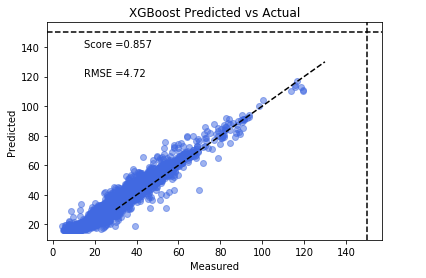

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

['./modelos/PM25/PM25_4hora_quantile.pkl']

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=1500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:36:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=1500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [ ]:
pronos_2_q = model[hora-1].predict(X_test)

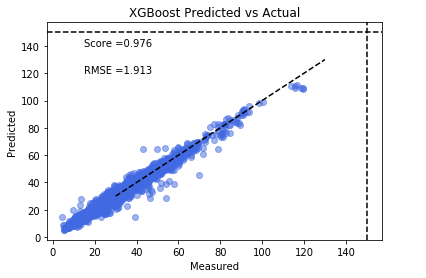

In [ ]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM25/PM25_4hora.pkl']

# HORA 5

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [ ]:
hora = 5

In [ ]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [ ]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [ ]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.5289            5.08m
         2           1.5155            5.07m
         3           1.5025            5.06m
         4           1.4893            5.06m
         5           1.4757            5.06m
         6           1.4627            5.06m
         7           1.4499            5.06m
         8           1.4378            5.03m
         9           1.4258            5.01m
        10           1.4139            5.00m
        20           1.3111            4.86m
        30           1.2247            4.81m
        40           1.1524            4.73m
        50           1.0896            4.62m
        60           1.0344            4.60m
        70           0.9860            4.58m
        80           0.9434            4.55m
        90           0.9053            4.50m
       100           0.8726            4.46m
       200           0.6396            4.04m
       300           0.5117            3.66m
       40

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=123,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

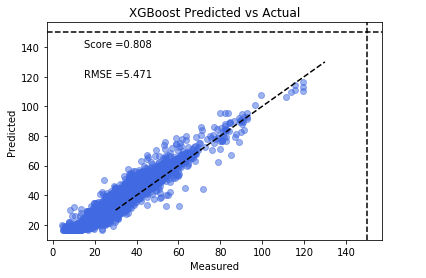

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

['./modelos/PM25/PM25_5hora_quantile.pkl']

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:45:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [ ]:
pronos_2_q = model[hora-1].predict(X_test)

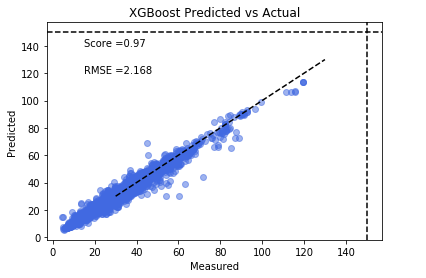

In [ ]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM25/PM25_5hora.pkl']

# HORA 6

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [ ]:
hora = 6

In [ ]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [ ]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]p
y = dataset[str(target+str(hora))]

In [ ]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.5312            4.56m
         2           1.5174            4.54m
         3           1.5038            4.52m
         4           1.4907            4.56m
         5           1.4775            4.60m
         6           1.4652            4.61m
         7           1.4527            4.62m
         8           1.4402            4.62m
         9           1.4279            4.62m
        10           1.4168            4.62m
        20           1.3143            4.60m
        30           1.2264            4.52m
        40           1.1538            4.49m
        50           1.0894            4.47m
        60           1.0366            4.45m
        70           0.9893            4.43m
        80           0.9480            4.41m
        90           0.9114            4.35m
       100           0.8750            4.32m
       200           0.6486            4.01m
       300           0.5237            3.65m
       40

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=123,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

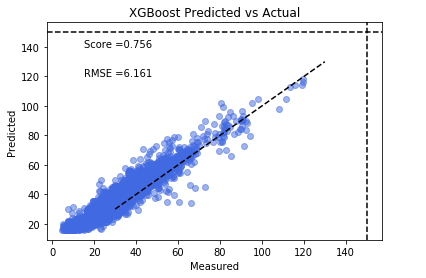

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

['./modelos/PM25/PM25_6hora_quantile.pkl']

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:57:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1.16,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=64, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [ ]:
pronos_2_q = model[hora-1].predict(X_test)

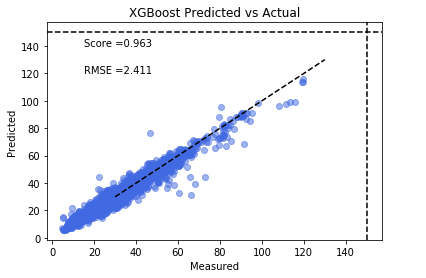

In [ ]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM25/PM25_6hora.pkl']

# HORA 7

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [437]:
hora = 7

In [438]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [439]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [440]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [441]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.5333            5.38m
         2           1.5201            5.37m
         3           1.5073            5.36m
         4           1.4950            5.34m
         5           1.4828            5.33m
         6           1.4706            5.33m
         7           1.4588            5.34m
         8           1.4471            5.33m
         9           1.4359            5.32m
        10           1.4247            5.32m
        20           1.3214            5.26m
        30           1.2305            5.20m
        40           1.1629            5.15m
        50           1.1017            5.11m
        60           1.0502            5.08m
        70           1.0024            5.04m
        80           0.9622            5.01m
        90           0.9243            4.97m
       100           0.8856            4.92m
       200           0.6654            4.58m
       300           0.5463            4.05m
       40

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=123,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

In [442]:
pronos_2_q = model[hora-1].predict(X_test)

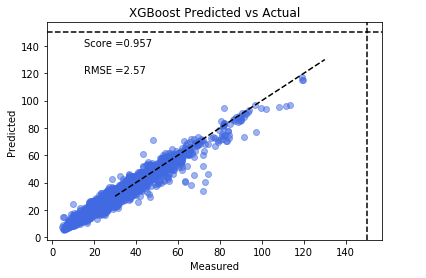

In [443]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

# HORA 8

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [444]:
hora = 8

In [445]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [446]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [447]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [448]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

       400           0.4996            3.51m
       500           0.4662            2.89m
       600           0.4461            2.27m


In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

In [449]:
pronos_2_q = model[hora-1].predict(X_test)

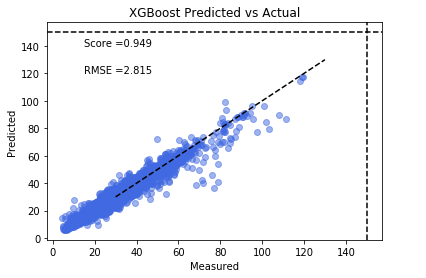

In [450]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

# HORA 9

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [451]:
hora = 9

In [452]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [453]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [454]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [455]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

In [456]:
pronos_2_q = model[hora-1].predict(X_test)

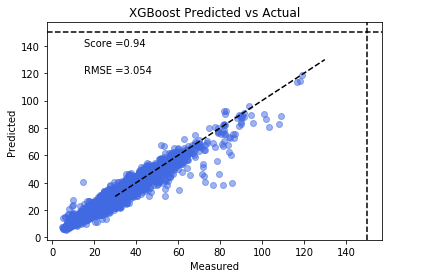

In [457]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

# HORA 10

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [458]:
hora = 10

In [459]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [460]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [461]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [462]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

In [463]:
pronos_2_q = model[hora-1].predict(X_test)

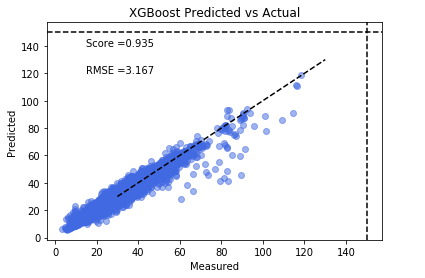

In [464]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

# HORA 11

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [465]:
hora = 11

In [466]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [467]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [468]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [469]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

In [ ]:
1*1

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
1*1

In [ ]:
model[hora-1].fit(X_train, y_train)

In [470]:
pronos_2_q = model[hora-1].predict(X_test)

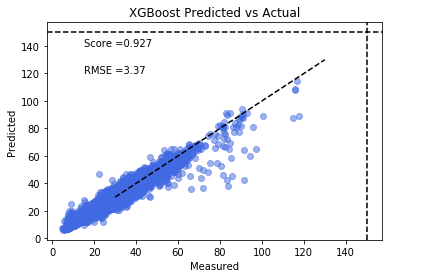

In [471]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

# HORA 12

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [472]:
hora = 12

In [473]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [474]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [475]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [476]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [478]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [479]:
modelq[hora-1].fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.5358            4.89m
         2           1.5229            4.97m
         3           1.5110            4.97m
         4           1.5000            5.02m
         5           1.4882            5.00m
         6           1.4772            4.98m
         7           1.4669            4.96m
         8           1.4567            4.95m
         9           1.4463            4.96m
        10           1.4359            4.97m
        20           1.3437            4.86m
        30           1.2699            4.77m
        40           1.2092            4.73m
        50           1.1576            4.68m
        60           1.1097            4.61m
        70           1.0706            4.55m
        80           1.0371            4.48m
        90           1.0054            4.36m
       100           0.9776            4.34m
       200           0.7835            4.13m
       300           0.6774            3.76m
       40

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=123,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [480]:
pronos_2_q = modelq[hora-1].predict(X_test)

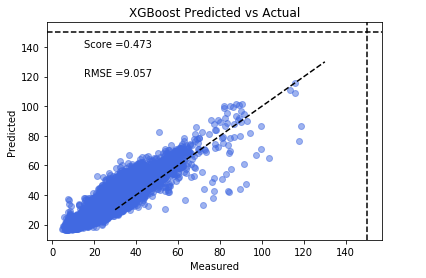

In [481]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [482]:
# now you ca[πn save it to a file
joblib.dump(model[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

['./modelos/PM25/PM25_12hora_quantile.pkl']

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

In [483]:
pronos_2_q = model[hora-1].predict(X_test)

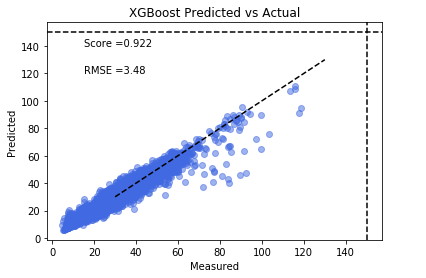

In [484]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

# HORA 13

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [485]:
hora = 13

In [486]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [487]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [488]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [489]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [491]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [492]:
modelq[hora-1].fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.5373            5.04m
         2           1.5252            5.05m
         3           1.5135            5.08m
         4           1.5021            5.07m
         5           1.4913            5.02m
         6           1.4806            5.00m
         7           1.4703            5.00m
         8           1.4604            4.98m
         9           1.4503            4.96m
        10           1.4405            4.94m
        20           1.3507            4.84m
        30           1.2798            4.77m
        40           1.2207            4.75m
        50           1.1716            4.70m
        60           1.1305            4.64m
        70           1.0918            4.57m
        80           1.0580            4.48m
        90           1.0298            4.39m
       100           1.0019            4.36m
       200           0.8056            4.20m
       300           0.6985            3.79m
       40

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=123,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [493]:
pronos_2_q = modelq[hora-1].predict(X_test)

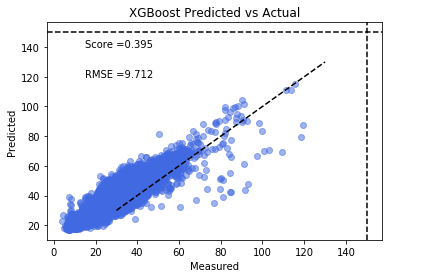

In [494]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [495]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

['./modelos/PM25/PM25_13hora_quantile.pkl']

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

In [496]:
pronos_2_q = model[hora-1].predict(X_test)

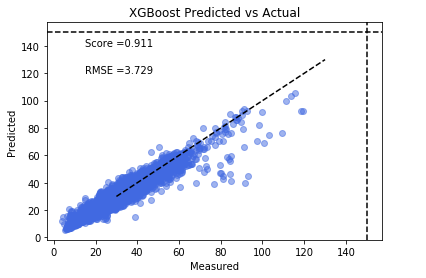

In [497]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

# HORA 14

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [498]:
hora = 14

In [499]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [500]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [501]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [504]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [505]:
modelq[hora-1].fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.5376            5.98m
         2           1.5262            5.98m
         3           1.5154            5.94m
         4           1.5045            5.93m
         5           1.4938            5.92m
         6           1.4832            5.92m
         7           1.4731            5.90m
         8           1.4634            5.82m
         9           1.4531            5.75m
        10           1.4436            5.68m
        20           1.3602            5.38m
        30           1.2933            5.23m
        40           1.2371            5.08m
        50           1.1872            4.93m
        60           1.1428            4.80m
        70           1.1063            4.70m
        80           1.0728            4.60m
        90           1.0445            4.51m
       100           1.0181            4.43m
       200           0.8230            4.22m
       300           0.7154            3.83m
       40

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             n_iter_no_change=None, presort='auto', random_state=123,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [506]:
pronos_2_q = modelq[hora-1].predict(X_test)

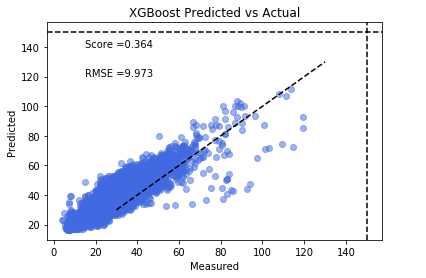

In [507]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [508]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

['./modelos/PM25/PM25_14hora_quantile.pkl']

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

In [509]:
pronos_2_q = model[hora-1].predict(X_test)

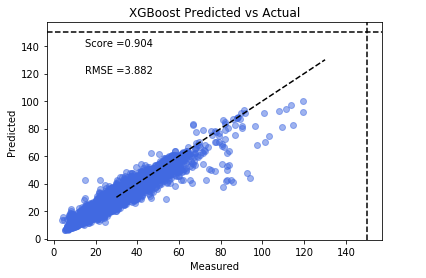

In [510]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl')

# HORA 15

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [23]:
hora = 15

In [24]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [25]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [26]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(model[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

In [28]:
pronos_2_q = model[hora-1].predict(X_test)

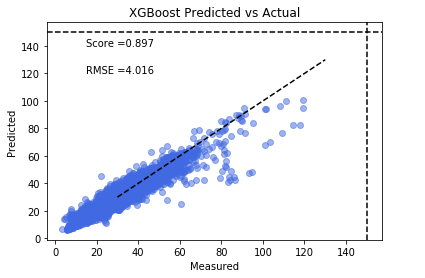

In [29]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl')

# HORA 16

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [30]:
hora = 16

In [31]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [32]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [33]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

In [35]:
pronos_2_q = model[hora-1].predict(X_test)

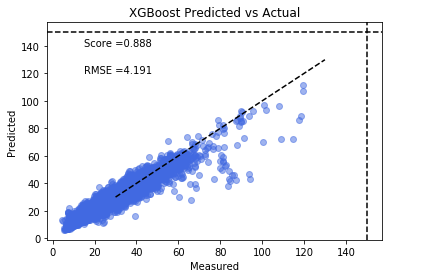

In [36]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

# HORA 17

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [37]:
hora = 17

In [38]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [39]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [40]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

In [42]:
pronos_2_q = model[hora-1].predict(X_test)

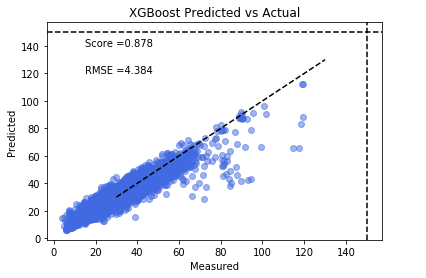

In [43]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

# HORA 18

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [44]:
hora = 18

In [45]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [46]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [47]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+ conta +'/'+ conta +'_'+str(hora)+'hora_quantile.pkl')

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

In [49]:
pronos_2_q = model[hora-1].predict(X_test)

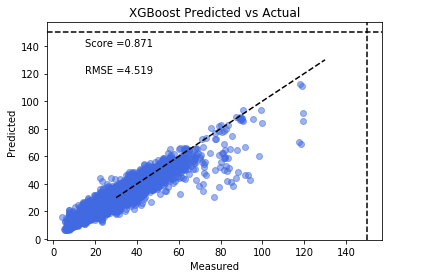

In [50]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+ conta+'_'+ str(hora) + 'hora.pkl') 

# HORA 19

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [51]:
 hora = 19

In [52]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [53]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [54]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(model[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

In [56]:
pronos_2_q = model[hora-1].predict(X_test)

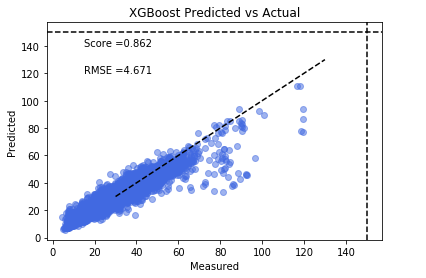

In [57]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

In [ ]:
1*1

# HORA 20

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [58]:
hora = 20

In [59]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [60]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [61]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

In [63]:
pronos_2_q = model[hora-1].predict(X_test)

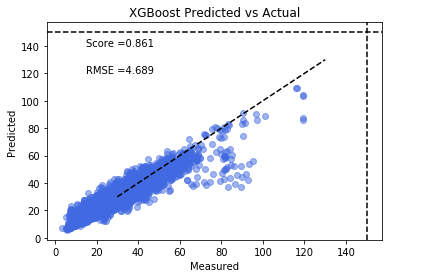

In [64]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

# HORA 21

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [65]:
hora = 21

In [66]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [67]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [68]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

In [70]:
pronos_2_q = model[hora-1].predict(X_test)

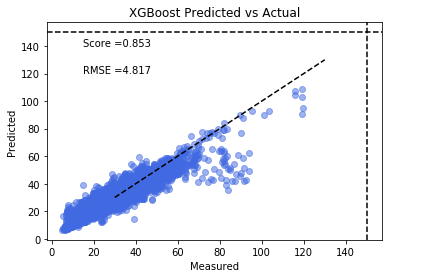

In [71]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl')

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [72]:
hora = 22

In [73]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [74]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [75]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

In [77]:
pronos_2_q = model[hora-1].predict(X_test)

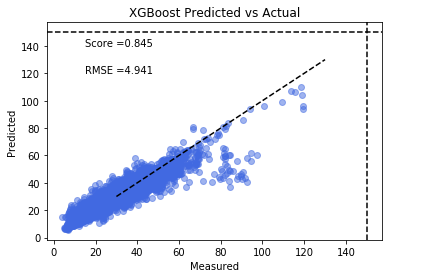

In [78]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

# HORA 23

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [79]:
hora = 23

In [80]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [81]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [82]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

## modelo normal

In [ ]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=64,random_state=123,max_depth=10, gamma=1.16)

In [ ]:
model[hora-1].fit(X_train, y_train)

In [84]:
pronos_2_q = model[hora-1].predict(X_test)

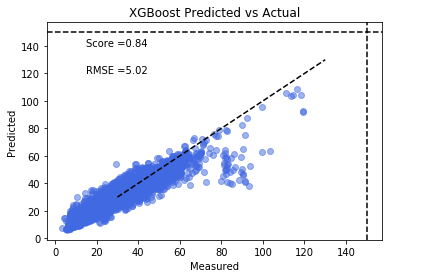

In [85]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [421]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'hora.pkl') 

['./modelos/PM25/PM25_23hora.pkl']

# HORA 24

### Definimos los conjuntos Train and Test<a class="anchor" id="5-bullet"></a>

In [15]:
hora = 24

In [16]:
dataset = data_hour_merge.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

In [17]:
X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

In [18]:
X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modelos

### Leemos el pasado

# Quantile 95

In [ ]:
modelq[hora-1] = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.01,loss="quantile",alpha=0.95,verbose=1,random_state=123)

In [ ]:
modelq[hora-1].fit(X_train, y_train)

In [ ]:
pronos_2_q = modelq[hora-1].predict(X_test)

In [ ]:
ploter(y_test,X_test,pronos_2_q,modelq[hora-1])

In [ ]:
# now you ca[πn save it to a file
joblib.dump(modelq[hora-1], './modelos/'+conta+'/'+conta+'_'+str(hora)+'hora_quantile.pkl')

## modelo normal

In [28]:
model[hora-1] = XGBRegressor(learning_rate=0.05,n_estimators=2500,n_jobs=100,random_state=123,max_depth=15)

In [29]:
model[hora-1].fit(X_train, y_train)

/home/paw/software/python/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:40:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=15, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=100, nthread=None, objective='reg:linear', random_state=123,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [32]:
pronos_2_q = model[hora-1].predict(X_test)

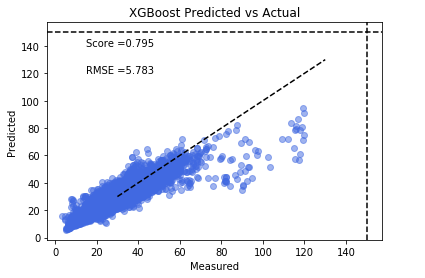

In [33]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

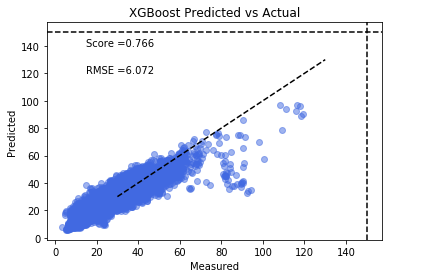

In [25]:
ploter(y_test,X_test,pronos_2_q,model[hora-1])

In [ ]:
ploter_title(y_test,X_test,pronos_2_q,model[hora-1],"PM10 móvil a 24 horas","Valor Medido","Valor Pronosticado","saddlebrown")

In [ ]:
# now you can save it to a file
joblib.dump(model[hora-1],'./modelos/'+conta+'/'+conta+'_'+str(hora)+'outlierhora.pkl') 

# Viz

## O3

In [ ]:
conta = "O3"
model_O3_24 = joblib.load(str('./modelos/'+ conta +'/'+ conta + '_'+str(24)+'hora.pkl'))

data_hour_merge_O3 = pd.read_csv("/DATA/paw/jupyterhub_notebook/daniel.bustillos/DanielBustillos/contaminación/pipeline-norberto/datos_modelos_O3.csv")

data_hour_merge_O3.head(2)

target = "O3_max_frcst_"

lista = []
for i in range(1,25):
    lista.append(str(target+str(i)))

hora = 24

dataset = data_hour_merge_O3.copy()
#dataset.drop(["fecha"],axis=1,inplace=True)
dataset.dropna(inplace=True)

X = dataset.loc[:, dataset.columns != str(target+str(hora))]
y = dataset[str(target+str(hora))]

X.drop(lista[hora:],axis=1,inplace=True)
if hora != 1:
    X.drop(lista[:hora-1],axis=1,inplace=True)

#Definimos los conjuntos de prueba:

X_train_O3, X_test_O3, y_train_O3, y_test_O3 = train_test_split(X, y, test_size=0.3, random_state=123)

#Predict 
pronos_1 = model_O3_24.predict(X_test_O3)

In [ ]:
plt.scatter(pronos_2_q, y_test,alpha=0.4,color="saddlebrown",label = "PM10")
plt.scatter(pronos_1, y_test_O3,alpha=0.1,color="royalblue",label="O3")

#score = round(model.score(X_test_0, y_test_0),3)
#rmse = round(np.sqrt(mean_squared_error(y_test_0, pronosticados_0)),3)
plt.plot([30,130],[30,130],color="k",linestyle='--')

plt.axhline(y=150, color='k', linestyle='--')
plt.axvline(x=150, color='k', linestyle='--')
plt.annotate('TP', (170,150), xytext = (175, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FN', (170,150), xytext = (175, 135 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 155 + 1), 
              horizontalalignment='right')
plt.annotate('FP', (170,150), xytext = (125, 135 + 1), 
              horizontalalignment='right')
#plt.annotate("Score ="+str(score), (15,139), xytext = (15, 139 + 1), 
              #horizontalalignment='left')
#plt.annotate("RMSE ="+str(rmse), (15,119), xytext = (15, 119 + 1), 
              #horizontalalignment='left')


plt.xlabel('Valor Medido')
plt.ylabel('Valor Pronosticado')
plt.title('Valores Medidos vs Pronosticados')

plt.show()

In [ ]:
import random

In [ ]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=280, facecolor='w', edgecolor='k')
ax = fig.gca()

# df_export.tail(60).head(50).plot(x="fecha", y=[ "O3_y"],ax=ax,label=["O3 Medido"],color="dodgerblue")
# df_export.tail(60).head(100).plot(x="fecha", y=["O3_y_frcst_6"],ax=ax,label=["Pronóstico O3 a 12 horas"],color='darkblue',dashes=[6, 2])
plt.plot([90,190],[90,190],color="k",alpha=0.9)
plt.scatter(pronos_2_q, y_test,alpha=0.8,color="saddlebrown",label = "PM10")
plt.scatter(pronos_1, y_test_O3,alpha=0.7,color="royalblue",label="O3")


plt.xlabel('Valor Medido')
plt.ylabel('Valor Pronosticado')
plt.title('Valores Medidos vs Pronosticados')

plt.axhline(y=150, color='k', linestyle='--',alpha=0.6)
plt.axvline(x=150, color='k', linestyle='--',alpha=0.6)


# And a corresponding grid
#ax.grid(which='both')

# Or if you want different settings for the grids:
# ax.grid(which='minor', alpha=0.01)
# ax.grid(which='major', alpha=0.3)

ax.set_xlim(80,200)
ax.set_ylim(80,200)

plt.legend()
plt.show()